# Step_By_Step_DataPreprocessing_Notebook

In [1]:
#Import neccessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings as wg
wg.filterwarnings("ignore")

# Reading our _csv file

In [2]:
#Importing company

df = pd.read_csv("companies.csv")
print("Data imported successfully")

Data imported successfully


In [3]:
df

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [4]:
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [5]:
df.tail()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN
196552,c:9998,196552,Company,9998,NaN,Closet Couture,closet couture,/company/closet-couture,ecommerce,operating,...,2006-07-01,2008-09-10,2.0,1.0,NaN,2008-08-24 16:46:13,2013-03-23 12:01:50,34.035633,-118.515590,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [7]:
df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [8]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [9]:
df.shape

(196553, 44)

# A. Data Cleaning
1. Deletting irrelevant and redundant information

In [10]:
#Deleting irrelevant attributes

df.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id','name',
       'normalized_name', 'permalink','domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'state_code', 'city', 'region','invested_companies', 'created_by',
       'created_at', 'updated_at'],axis=1, inplace=True)
df.shape

(196553, 19)

In [11]:
df.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum()

category_code           73367
status                      0
founded_at             105326
closed_at              193933
country_code           108563
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_total_usd      168679
first_milestone_at     104854
last_milestone_at      104854
milestones             104854
relationships           66886
lat                    112701
lng                    112701
ROI                    195827
dtype: int64

<AxesSubplot:>

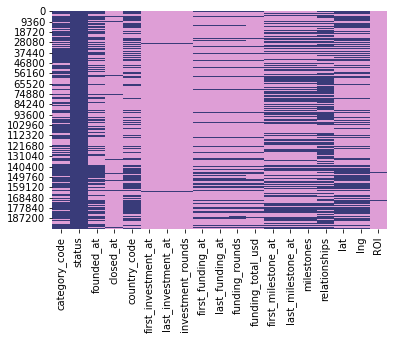

In [13]:
sns.heatmap(df.isnull(),cbar=False,cmap='tab20b')

In [14]:
#d. Deletting duplicate values if any

df.duplicated().any()

True

In [15]:
#Checking no.of rows are duplicated

duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

87089


,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
79,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
114,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,acquired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
132,NaN,acquired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196533,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196534,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196535,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196536,NaN,operating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Deleting duplicate values if any

df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [17]:
#percentage of nan in each columns:

round((((df.isnull().sum())/(len(df)))*100),2).sort_values(ascending=False)

ROI                    99.34
first_investment_at    97.95
last_investment_at     97.95
investment_rounds      97.94
closed_at              97.61
funding_total_usd      74.55
first_funding_at       71.25
last_funding_at        71.25
funding_rounds         71.07
first_milestone_at     48.74
last_milestone_at      48.74
milestones             48.74
relationships          31.43
lat                    25.91
lng                    25.91
founded_at             24.59
country_code           22.72
category_code          11.17
status                  0.00
dtype: float64

In [18]:
#Deleting those which has more than 98% of null values

df.drop(['ROI','first_investment_at', 'last_investment_at', 'investment_rounds'],axis=1,inplace= True)
df.shape

(109464, 15)

In [19]:
# Deleting instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'

df.dropna(subset=['status', 'country_code', 'category_code','founded_at'],inplace=True)

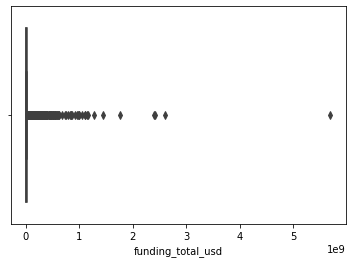

count    2.046700e+04
mean     1.582132e+07
std      6.990693e+07
min      2.910000e+02
25%      5.110380e+05
50%      2.725875e+06
75%      1.200000e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64

In [20]:
#Deleting outliers for 'funding_total_usd'

sns.boxplot(x=df["funding_total_usd"])
plt.show()
df.funding_total_usd.describe()

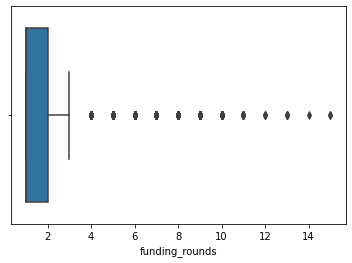

In [21]:
#Deleting outliers for 'funding_rounds'

sns.boxplot(x=df["funding_rounds"])
plt.show()

# Summary:

#wesee the outlier in both 'funding_total_usd' and 'funding_rounds'. 
#So, let's find them and drop it.

1. Find the IQR (Interquartile Range)
2. Find the upper and lower limit
3. Find outliers
4. Drop them
5. Compare the plots after trimming 

In [23]:
# Find the IQR for funding_total_usd

Q1_FTU = df.funding_total_usd.quantile(0.25)
Q3_FTU = df.funding_total_usd.quantile(0.75)
Q1_FTU, Q3_FTU
IQR_FTU = Q3_FTU - Q1_FTU
print(f"IQR of funding_total_usd is: {IQR_FTU}\n")

# Find the IQR for funding_rounds

Q1_FR = df.funding_rounds.quantile(0.25)
Q3_FR = df.funding_rounds.quantile(0.75)
Q1_FR, Q3_FR
IQR_FR = Q3_FR - Q1_FR
print(f"IQR of funding_rounds is: {IQR_FR}")

IQR of funding_total_usd is: 11488962.0

IQR of funding_rounds is: 1.0


In [24]:
#Find the Upper and Lower limit for funding_total_usd

lower_limit_FTU = Q1_FTU - 1.5*IQR_FTU
upper_limit_FTU = Q3_FTU + 1.5*IQR_FTU
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FTU}")
print(f"upper limit is: {upper_limit_FTU}\n")

#Find the Upper and Lower limit for funding_rounds

lower_limit_FR = Q1_FR - 1.5*IQR_FR
upper_limit_FR = Q3_FR + 1.5*IQR_FR
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FR}")
print(f"upper limit is: {upper_limit_FR}")

funding_total_usd
lower limit is: -16722405.0
upper limit is: 29233443.0

funding_total_usd
lower limit is: -0.5
upper limit is: 3.5


In [25]:
#Find outliers for funding_total_usd

funding_total_usd_outliers=df[(df.funding_total_usd<lower_limit_FTU)|(df.funding_total_usd>upper_limit_FTU)]
print(funding_total_usd_outliers.shape)

#Find outliers for funding_rounds

funding_rounds_outliers=df[(df.funding_rounds<lower_limit_FR)|(df.funding_rounds>upper_limit_FR)]
print(funding_rounds_outliers.shape)

(2561, 15)
(2182, 15)


In [26]:
#Drop the outliers funding_total_usd

df.drop(df[(df.funding_total_usd<lower_limit_FTU)|(df.funding_total_usd>upper_limit_FTU)].index,inplace=True)

#Drop the outliers funding_rounds
df.drop(df[(df.funding_rounds<lower_limit_FR)|(df.funding_rounds>upper_limit_FR)].index,inplace=True)

In [27]:
df

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008-01-01,NaN,USA,NaN,NaN,NaN,NaN,2008-01-01,2008-01-01,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [ ]:
# 2.c. Delete contradictory (mutually opposed or inconsistent data).

In [ ]:
## Since we have not imputed the datasets in closed_at yet, we will check it later on.

# B. Date Transformation

In [ ]:
#It can be divided into two successive phases.

# 1. Changes in original data
a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
   last_milestone_at to years.
b. Generalize the categorical data i.e. category_code, status and category_code.

# 2. Create new variables
a. Create new feature isClosed from closed_at and status.
b. Create new feature 'active_days'

In [28]:
#  Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

df['founded_at']=pd.to_datetime(df['founded_at'], format='%Y-%m-%d').dt.year
df['closed_at']=pd.to_datetime(df['closed_at'], format='%Y-%m-%d').dt.year
df['first_funding_at']=pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d').dt.year
df['last_funding_at']=pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d').dt.year
df['first_milestone_at']=pd.to_datetime(df['first_milestone_at'], format='%Y-%m-%d').dt.year
df['last_milestone_at']=pd.to_datetime(df['last_milestone_at'],format='%Y-%m-%d').dt.year
df.dtypes

category_code          object
status                 object
founded_at              int64
closed_at             float64
country_code           object
first_funding_at      float64
last_funding_at       float64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at    float64
last_milestone_at     float64
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

# 1.b. Generalize the categorical data i.e. category_code and country_code

In [29]:
# Generalize the categorical company - category_code

df.category_code.unique()

array(['advertising', 'cleantech', 'web', 'games_video', 'mobile',
       'software', 'network_hosting', 'consulting', 'finance',
       'education', 'medical', 'manufacturing', 'enterprise', 'other',
       'ecommerce', 'public_relations', 'hardware', 'search', 'analytics',
       'news', 'government', 'security', 'biotech', 'photo_video',
       'travel', 'health', 'semiconductor', 'social', 'legal',
       'transportation', 'hospitality', 'sports', 'nonprofit', 'fashion',
       'messaging', 'music', 'automotive', 'design', 'real_estate',
       'local', 'pets', 'nanotech'], dtype=object)

In [30]:
df.category_code.value_counts()

software            10888
web                  7752
ecommerce            4831
other                4700
mobile               3700
advertising          3575
games_video          2789
consulting           2780
enterprise           2472
biotech              2006
public_relations     1561
hardware             1434
network_hosting      1254
education            1149
search                976
cleantech             798
analytics             646
social                645
finance               638
security              612
health                601
legal                 362
medical               361
semiconductor         360
travel                330
news                  282
manufacturing         276
fashion               271
hospitality           267
real_estate           220
local                 197
photo_video           196
messaging             180
music                 179
sports                165
transportation        126
nonprofit             114
design                106
automotive  

In [31]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.

category_others_index = df.category_code.value_counts()[9:].index
df['category_code'] = df['category_code'].replace(to_replace=category_others_index,value='other')

In [32]:
# Let's check if we've more than 15 columns

print('Unique no of category_code : ',df['category_code'].nunique())
df.category_code.value_counts()

Unique no of category_code :  9


other          21200
software       10888
web             7752
ecommerce       4831
mobile          3700
advertising     3575
games_video     2789
consulting      2780
enterprise      2472
Name: category_code, dtype: int64

In [33]:
# One-hot encoding to category_code

dummy = pd.get_dummies(df["category_code"], drop_first=True)

In [34]:
# Concatenate category with company companyset

df=pd.concat([df, dummy], axis=1)
df.head()

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,lat,lng,consulting,ecommerce,enterprise,games_video,mobile,other,software,web
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,...,30.427755,-9.598107,0,0,0,0,0,0,0,0
6,other,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,...,22.307159,73.181219,0,0,0,0,0,1,0,0
12,advertising,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2008.0,...,35.686975,-105.937799,0,0,0,0,0,0,0,0
13,web,acquired,2007,NaN,USA,2008.0,2008.0,1.0,5000000.0,2008.0,...,37.386052,-122.083851,0,0,0,0,0,0,0,1
15,games_video,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2008.0,...,33.078655,-116.601964,0,0,0,1,0,0,0,0


In [35]:
# Since, We've added the encoded category_columns, let's delete original category_code

df.drop(["category_code"],axis=1,inplace=True)

# Let's encode 'country' column now.

In [36]:
# Generalize the categorical company - country_code

df.country_code.nunique()

165

In [37]:
# Since there are 165 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.

df.country_code.unique()

array(['MAR', 'IND', 'USA', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
       'GBR', 'THA', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN', 'RUS',
       'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK', 'PAK',
       'HUN', 'CAN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD', 'ARG',
       'CHE', 'UKR', 'ITA', 'NZL', 'CZE', 'VNM', 'NOR', 'HRV', 'BEN',
       'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK', 'TWN', 'CRI',
       'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'COL', 'PHL', 'ARE', 'IDN',
       'ROM', 'ANT', 'NGA', 'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN',
       'BGR', 'PER', 'LVA', 'CYP', 'LAO', 'NPL', 'MDA', 'CMR', 'UGA',
       'TUN', 'URY', 'MUS', 'VEN', 'OMN', 'ECU', 'KWT', 'JOR', 'LTU',
       'ALB', 'SVN', 'QAT', 'PST', 'REU', 'GTM', 'PCN', 'BHS', 'GEO',
       'BWA', 'DZA', 'GRD', 'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA',
       'BHR', 'SYC', 'SLE', 'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV',
       'AFG', 'BLZ', 'UZB', 'LIE', 'IRN', 'ARM', 'ATG', 'UMI', 'DOM',
       'MDV', 'MMR',

In [38]:
# Lets keep the country as same of it falls under above 10 otherwise let's replaceit with other.

country_code_others_index = df['country_code'].value_counts()[9:].index
df['country_code'] = df['country_code'].replace(to_replace=country_code_others_index,value='other')

In [39]:
# One-hot encoding to country_code

dummy = pd.get_dummies(df["country_code"], drop_first=True)

In [40]:
# Concatenate country_code with company companyset

df=pd.concat([df, dummy], axis=1)
df.head()

,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,web,CAN,DEU,ESP,FRA,GBR,IND,ISR,USA,other
5,operating,2007,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
12,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,0,1,0
13,acquired,2007,NaN,USA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,...,1,0,0,0,0,0,0,0,1,0
15,operating,2008,NaN,USA,NaN,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
# Since, We've added the encoded country_code , let's delete original country_code

df.drop(["country_code"],axis=1,inplace=True)

# 2. Create new variables
a. Create new feature isClosed from closed_at and status. b. Create new feature 'active_days'

# 2.a. Create new feature isClosed from closed_at and status.
if the value in status is 'operating' or 'ipo', Let's put 1.
Where as if the value is 'acquired' or 'closed', let's put 0.

In [42]:
df['status'].value_counts()

operating    54539
acquired      3488
closed        1518
ipo            442
Name: status, dtype: int64

In [43]:
def isClosed(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return 1
    else:
        return 0
df['isClosed'] = df.apply(lambda rw: isClosed(rw),axis=1)

# In the above if else statement we have used  'operating' & 'ipo' 
# with if only because there are only 4 unique variables in the column 
# and as per above mentined problem statement other two are including in the else statement

In [44]:
df

,status,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,CAN,DEU,ESP,FRA,GBR,IND,ISR,USA,other,isClosed
5,operating,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,1
6,operating,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
12,operating,2008,NaN,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,...,0,0,0,0,0,0,0,1,0,1
13,acquired,2007,NaN,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,...,0,0,0,0,0,0,0,1,0,0
15,operating,2008,NaN,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,NaN,NaN,NaN,NaN,2013.0,2013.0,2.0,...,0,0,0,0,0,0,0,1,0,1
196549,operating,2007,NaN,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,...,0,0,0,0,0,0,0,1,0,1
196550,operating,1959,NaN,NaN,NaN,NaN,NaN,2012.0,2013.0,3.0,...,0,0,0,0,0,0,0,1,0,1
196551,operating,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,1


In [45]:
df.isClosed.value_counts()

1    54981
0     5006
Name: isClosed, dtype: int64

# 2.b. Create active_days

In [46]:
#Create active_days

# i. Replacing values:
#     -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
#     - Where as if the value is 'acquired' or 'closed', let's put 0.
# ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days, 
#     check contradictory issues we didn't check it before).
# iii. Then, delete the closed_at column.

In [47]:
def closed_at(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return 2021
    else:
        return 0

# 2.b.i Replacing the values in closed_at column

In [48]:
# i Replacing the values in closed_at column

df['closed_at'] = df.apply(lambda x: closed_at(x),axis=1)
df[["closed_at","status"]].head(20)

,closed_at,status
5,2021,operating
6,2021,operating
12,2021,operating
13,0,acquired
15,2021,operating
18,0,acquired
20,2021,operating
22,2021,operating
25,2021,operating
26,2021,operating


# 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)¶

In [49]:
# ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

active_days=365*((df['closed_at']).astype('float64')-(df['founded_at']).astype('float64'))
df['active_days']=active_days
index_name=df['active_days'].sort_values().head(65).index
df.drop(index_name,inplace=True)
df['active_days']

5           5110.0
6           4745.0
12          4745.0
13       -732555.0
15          4745.0
            ...   
196548      5110.0
196549      5110.0
196550     22630.0
196551      4745.0
196552      5110.0
Name: active_days, Length: 59922, dtype: float64

# 2.b.iii. Then, delete the closed_at column.

In [50]:
# iii. Then, delete the closed_at column

df.drop(['closed_at'],axis=1,inplace=True)

# Let's work on target variabe now.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59922 entries, 5 to 196552
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              59922 non-null  object 
 1   founded_at          59922 non-null  int64  
 2   first_funding_at    19118 non-null  float64
 3   last_funding_at     19118 non-null  float64
 4   funding_rounds      19258 non-null  float64
 5   funding_total_usd   16856 non-null  float64
 6   first_milestone_at  32376 non-null  float64
 7   last_milestone_at   32376 non-null  float64
 8   milestones          32376 non-null  float64
 9   relationships       44814 non-null  float64
 10  lat                 57596 non-null  float64
 11  lng                 57596 non-null  float64
 12  consulting          59922 non-null  uint8  
 13  ecommerce           59922 non-null  uint8  
 14  enterprise          59922 non-null  uint8  
 15  games_video         59922 non-null  uint8  
 16  mob

In [52]:
df.shape

(59922, 31)

In [53]:
df.isna().sum().sort_values(ascending=False)

funding_total_usd     43066
first_funding_at      40804
last_funding_at       40804
funding_rounds        40664
first_milestone_at    27546
last_milestone_at     27546
milestones            27546
relationships         15108
lat                    2326
lng                    2326
ISR                       0
FRA                       0
GBR                       0
IND                       0
status                    0
USA                       0
other                     0
isClosed                  0
DEU                       0
ESP                       0
games_video               0
CAN                       0
web                       0
software                  0
other                     0
mobile                    0
founded_at                0
enterprise                0
ecommerce                 0
consulting                0
active_days               0
dtype: int64

In [55]:
df.shape

(59922, 31)

In [56]:
df.describe()

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,...,DEU,ESP,FRA,GBR,IND,ISR,USA,other,isClosed,active_days
count,59922.000000,19118.000000,19118.000000,19258.000000,1.685600e+04,32376.000000,32376.000000,32376.000000,44814.000000,57596.000000,...,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000,59922.000000
mean,2005.528404,2010.275552,2010.837012,1.425849,4.566485e+06,2009.503552,2010.080893,1.356808,3.892578,37.205120,...,0.022596,0.014669,0.020460,0.082708,0.049748,0.012733,0.564050,0.172374,0.917543,-55178.653583
std,9.807450,2.696990,2.545214,0.660639,6.287402e+06,4.091108,3.951213,0.663631,13.062917,16.119125,...,0.148613,0.120225,0.141569,0.275442,0.217426,0.112122,0.495885,0.377708,0.275062,202601.655176
min,1901.000000,1960.000000,1960.000000,1.000000,2.910000e+02,1960.000000,1960.000000,1.000000,1.000000,-50.942326,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-734380.000000
25%,2004.000000,2009.000000,2010.000000,1.000000,3.949605e+05,2009.000000,2009.000000,1.000000,1.000000,34.019454,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3650.000000
50%,2008.000000,2011.000000,2012.000000,1.000000,1.647750e+06,2011.000000,2011.000000,1.000000,2.000000,39.768403,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4380.000000
75%,2011.000000,2012.000000,2013.000000,2.000000,6.000000e+06,2012.000000,2012.000000,2.000000,4.000000,45.476545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5840.000000
max,2014.000000,2013.000000,2013.000000,3.000000,2.922000e+07,2014.000000,2014.000000,7.000000,1189.000000,77.553604,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43800.000000


In [57]:
#Remove the null vaues with the mean value in 'Numerical Data'

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
company=df.select_dtypes(include=numerics)
list(df.columns)

['status',
 'founded_at',
 'first_funding_at',
 'last_funding_at',
 'funding_rounds',
 'funding_total_usd',
 'first_milestone_at',
 'last_milestone_at',
 'milestones',
 'relationships',
 'lat',
 'lng',
 'consulting',
 'ecommerce',
 'enterprise',
 'games_video',
 'mobile',
 'other',
 'software',
 'web',
 'CAN',
 'DEU',
 'ESP',
 'FRA',
 'GBR',
 'IND',
 'ISR',
 'USA',
 'other',
 'isClosed',
 'active_days']

In [58]:
df['first_funding_at']=df['first_funding_at'].replace(np.nan, df['first_funding_at'].mean())

df['last_funding_at']=df['last_funding_at'].replace(np.nan, df['last_funding_at'].mean())

df['funding_rounds']=df['funding_rounds'].replace(np.nan, df['funding_rounds'].mean())

df['funding_total_usd']=df['funding_total_usd'].replace(np.nan, df['funding_total_usd'].mean())

df['first_milestone_at']=df['first_milestone_at'].replace(np.nan, df['first_milestone_at'].mean())

df['last_milestone_at']=df['last_milestone_at'].replace(np.nan,df['last_milestone_at'].mean())

df['milestones']=df['milestones'].replace(np.nan, df['milestones'].mean())

df['relationships']=df['relationships'].replace(np.nan, df['relationships'].mean())

df['lat']=df['lat'].replace(np.nan, df['lat'].mean())

df['lng']=df['lng'].replace(np.nan, df['lng'].mean())

df.head(10)

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,DEU,ESP,FRA,GBR,IND,ISR,USA,other,isClosed,active_days
5,operating,2007,2010.275552,2010.837012,1.425849,4.566485e+06,2009.503552,2010.080893,1.356808,2.000000,...,0,0,0,0,0,0,0,1,1,5110.0
6,operating,2008,2010.275552,2010.837012,1.425849,4.566485e+06,2009.503552,2010.080893,1.356808,3.892578,...,0,0,0,0,1,0,0,0,1,4745.0
12,operating,2008,2010.275552,2010.837012,1.425849,4.566485e+06,2008.000000,2008.000000,1.000000,2.000000,...,0,0,0,0,0,0,1,0,1,4745.0
13,acquired,2007,2008.000000,2008.000000,1.000000,5.000000e+06,2008.000000,2012.000000,3.000000,14.000000,...,0,0,0,0,0,0,1,0,0,-732555.0
15,operating,2008,2010.275552,2010.837012,1.425849,4.566485e+06,2008.000000,2008.000000,1.000000,3.000000,...,0,0,0,0,0,0,1,0,1,4745.0
18,acquired,2008,2008.000000,2008.000000,1.000000,4.566485e+06,1995.000000,2012.000000,4.000000,9.000000,...,0,0,0,0,0,0,1,0,0,-732920.0
20,operating,2003,2011.000000,2012.000000,3.000000,1.012529e+07,2010.000000,2010.000000,1.000000,6.000000,...,0,0,0,0,0,0,1,0,1,6570.0
22,operating,2011,2010.275552,2010.837012,1.425849,4.566485e+06,2011.000000,2011.000000,1.000000,2.000000,...,0,0,0,0,0,0,0,0,1,3650.0
25,operating,2011,2010.275552,2010.837012,1.425849,4.566485e+06,2009.503552,2010.080893,1.356808,3.892578,...,0,0,0,0,0,0,1,0,1,3650.0
26,operating,2003,2003.000000,2003.000000,1.000000,2.500000e+05,2007.000000,2007.000000,1.000000,2.000000,...,0,0,0,0,0,0,0,0,1,6570.0


In [60]:
# First let's check how much of rows has nan values and drop them.

df.isna().sum().sort_values(ascending=False)

status                0
mobile                0
isClosed              0
other                 0
USA                   0
ISR                   0
IND                   0
GBR                   0
FRA                   0
ESP                   0
DEU                   0
CAN                   0
web                   0
software              0
other                 0
games_video           0
founded_at            0
enterprise            0
ecommerce             0
consulting            0
lng                   0
lat                   0
relationships         0
milestones            0
last_milestone_at     0
first_milestone_at    0
funding_total_usd     0
funding_rounds        0
last_funding_at       0
first_funding_at      0
active_days           0
dtype: int64

In [62]:
df.isnull().sum().any()

False

In [63]:
#Finally Save cleaned Data.

df.to_csv('New_companies.csv',index=False)